<a href="https://colab.research.google.com/github/kazuki-komori/lec-text_mining/blob/master/colab/text_mining_kimatsu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
from numpy.ma.extras import unique
from tqdm.notebook import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import gensim

In [40]:
df_livedoor = pd.read_csv("/content/livedoor_9topick.csv", encoding="CP932", index_col=0)

In [38]:
df_dokujo = df_livedoor[0:500]
df_home = df_livedoor[501:1000]
df_it = df_livedoor[1001:1500]
df_kaden = df_livedoor[1501:2000]
df_movie = df_livedoor[2001:2500]
df_peachy = df_livedoor[2501:3000]
df_smax = df_livedoor[3001:3500]
df_sports = df_livedoor[3501:4000]
df_news = df_livedoor[4001:4500]

In [92]:
df_livedoor = df_livedoor.drop(["OTHERS"], axis=1)

In [41]:
def to_btm(df):
  df_btm = []
  for word in tqdm(df.columns):
    if word == "OTHERS":
      continue
    for (idx, title) in enumerate(df.index):
      num = df[word][idx]
      if num == 0:
        continue
      df_btm.extend([[idx, word]] * num)
      # print(df_btm)
      # df_btm.append([[idx, word]] * num)
  return pd.DataFrame(df_btm)

      


In [82]:
btm_df = to_btm(df_livedoor[:][500:2000])
btm_df.set_axis(["id", "word"], axis=1)
btm_df.to_csv("btm_livedoor.csv", index=False)
# df_livedoor[:][1:2]

  0%|          | 0/481 [00:00<?, ?it/s]

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
install.packages("BTM")
library(BTM)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/BTM_0.3.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 112400 bytes (109 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to

In [87]:
%%R
data <- read.csv("/content/btm_livedoor.csv")
res.BTM = BTM(data, k=3, iter = 100, background = T)

In [88]:
%%R
score <- round(predict(res.BTM, newdata = data), 5)
score <- as.data.frame(score)
colnames(score) <- c(1:3)
topics <- colnames(score)[max.col(score, ties.method = "first")]
res.topic <- data.frame(c(1:1500), topics)
colnames(res.topic) <- c("id", "topic")
head(res.topic)
write.csv(res.topic, "btm_topic.csv")

In [64]:
%%R
head(score)

        1       2       3
0 0.00097 0.74394 0.25509
1 0.00139 0.66667 0.33194
2 0.00156 0.69940 0.29904
3 0.00089 0.67653 0.32258
4 0.00125 0.45222 0.54653
5 0.00136 0.37332 0.62532


In [ ]:
%%R
install.packages(c("tidytext", "ggplot2", "tidyverse"))

In [10]:
!apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 55.7 MB of archives.
After this operation, 92.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Fetched 55.7 MB in 3s (21.2 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20190409+repack1-0ubuntu0.18.04_all.deb ...
Unpacking fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Setting up fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


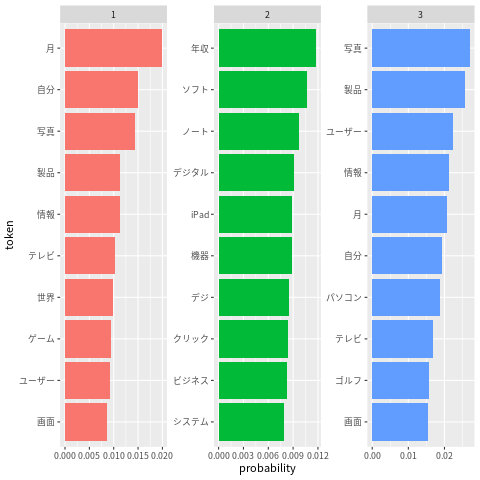

In [89]:
%%R
# 可視化
library(tidytext)
library(ggplot2)
library(tidyverse)
tks <- terms(res.BTM, top_n = 10)
top_terms <- tks[[1]]
# top_terms <- rbind(top_terms, tks[[2]])
for(i in 2:3) {
    top_terms <- rbind(top_terms, tks[[i]])
}
top_terms$topic <- rep(c(1:3), each = 10)
top_terms %>%
  mutate(token = reorder_within(token, probability, topic)) %>%
  ggplot(aes(probability, token, fill = factor(topic))) +
  theme(text=element_text(family="Noto Sans CJK JP")) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  scale_y_reordered()

In [16]:
%%R
write.csv(res.topic, "btm_topic.csv")

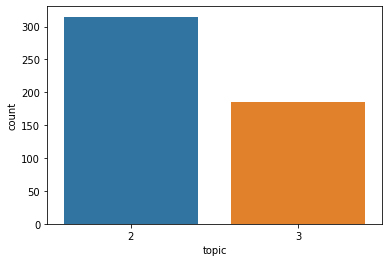

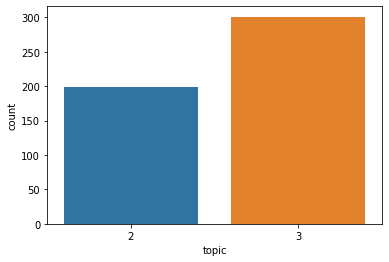

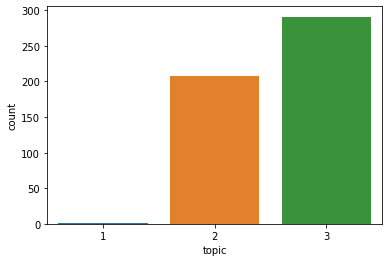

In [90]:
btm_topic = pd.read_csv("/content/btm_topic.csv", index_col=0)
for idx in range(0, 1500, 500):
  sns.countplot(x=btm_topic["topic"][idx:idx+500])
  plt.show()

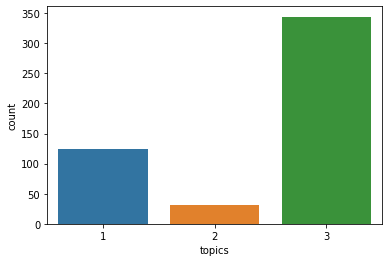

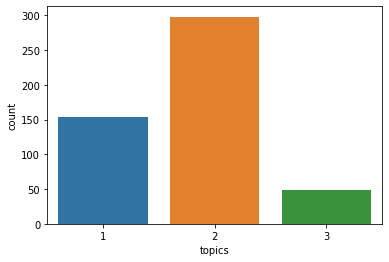

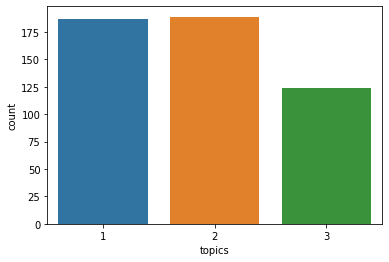

In [116]:
btm_topic = pd.read_csv("/content/LDA_topic.csv", index_col=0)
for idx in range(0, 1500, 500):
  sns.countplot(x=btm_topic["topics"][idx:idx+500])
  plt.show()